# 2020 Homeless Count Data by Census Tract
### Source: Economic Roundtable https://economicrt.org/publication/los-angeles-county-homeless-count-data-library/

This data was sent to me by Tiffany when I was asking for houseless count data by census tract. Thanks Tiffany!

In [1]:
#Importing the excel spreadsheet as a dataframe

import pandas as pd

df = pd.read_excel('2020-Street-Count-Results-by-Census-Tract-trimmed.xlsx')

In [2]:
# Taking a look at which are the relevant columns. Looks like 'FID_LA_Cou' is the count data
df.head()

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,NAMELSAD10,CT_NAME,...,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11
0,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Census Tract 1011.10,Tujunga Canyon Blvd,...,S,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5
1,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,Census Tract 1011.22,NaN,...,S,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5
2,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Census Tract 1012.10,Little Landers Park,...,S,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5
3,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Census Tract 1012.20,Haines Canyon Ave,...,S,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5
4,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Census Tract 1013,Mt. Glesson Ave,...,S,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5


In [3]:
# We've got lat long so let's turn this into a GDF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FID_LA_Cou      2344 non-null   int64  
 1   STATEFP10       2344 non-null   int64  
 2   COUNTYFP10      2344 non-null   int64  
 3   TRACTCE10       2344 non-null   int64  
 4   GEOID10         2344 non-null   int64  
 5   Non-CoC Flag    2344 non-null   int64  
 6   Non-CoC Place   2344 non-null   object 
 7   NAME10          2344 non-null   float64
 8   NAMELSAD10      2344 non-null   object 
 9   CT_NAME         1695 non-null   object 
 10  MTFCC10         2344 non-null   object 
 11  FUNCSTAT10      2344 non-null   object 
 12  ALAND10         2344 non-null   int64  
 13  AWATER10        2344 non-null   int64  
 14  INTPTLAT10      2344 non-null   float64
 15  INTPTLON10      2344 non-null   float64
 16  FID_Servic      2344 non-null   int64  
 17  SPA_NAME        2344 non-null   o

In [4]:
# Converting to GDF with the appropriate columns as lat and long
import geopandas as gpd
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.INTPTLON10, df.INTPTLAT10))

In [5]:
# Quick look, seems to have worked
gdf

,FID_LA_Cou,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,Non-CoC Flag,Non-CoC Place,NAME10,NAMELSAD10,CT_NAME,...,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,FID_Servic,SPA_NAME,SPA_2012,LACityCD12,LA_CoSupDist11,geometry
0,1463,6,37,101110,6037101110,1,Great LA Continuum of Care,1011.10,Census Tract 1011.10,Tujunga Canyon Blvd,...,1142405,0,34.259474,-118.292987,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29299 34.25947)
1,671,6,37,101122,6037101122,1,Great LA Continuum of Care,1011.22,Census Tract 1011.22,NaN,...,2644043,0,34.267721,-118.290147,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29015 34.26772)
2,1445,6,37,101210,6037101210,1,Great LA Continuum of Care,1012.10,Census Tract 1012.10,Little Landers Park,...,650691,0,34.252972,-118.290731,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.29073 34.25297)
3,1703,6,37,101220,6037101220,1,Great LA Continuum of Care,1012.20,Census Tract 1012.20,Haines Canyon Ave,...,698967,0,34.251609,-118.281632,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.28163 34.25161)
4,1578,6,37,101300,6037101300,1,Great LA Continuum of Care,1013.00,Census Tract 1013,Mt. Glesson Ave,...,2580401,0,34.248778,-118.270999,1,SPA 2: San Fernando,2,7.0,5,POINT (-118.27100 34.24878)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2046,6,37,577602,6037577602,2,"Long Beach city, CA",5776.02,Census Tract 5776.02,Bixby Village Golf Course,...,1324998,69272,33.770058,-118.112671,7,SPA 8: South Bay,8,NaN,4,POINT (-118.11267 33.77006)
2340,2044,6,37,577603,6037577603,2,"Long Beach city, CA",5776.03,Census Tract 5776.03,Marine Stadium Acueducto,...,2682520,298384,33.769113,-118.127319,7,SPA 8: South Bay,8,NaN,4,POINT (-118.12732 33.76911)
2341,2159,6,37,577604,6037577604,2,"Long Beach city, CA",5776.04,Census Tract 5776.04,NaN,...,853432,645395,33.755750,-118.110085,7,SPA 8: South Bay,8,NaN,4,POINT (-118.11009 33.75575)
2342,1695,6,37,980018,6037980018,2,"Long Beach city, CA",9800.18,Census Tract 9800.18,NaN,...,7372384,21307,33.815252,-118.153909,7,SPA 8: South Bay,8,NaN,4,POINT (-118.15391 33.81525)


<AxesSubplot:>

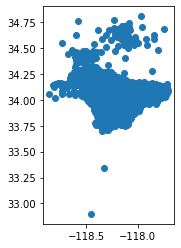

In [6]:
# Quick plot to make sure it looks like LA County, sure enough it does
gdf.plot()

## Bringing in tract polygon data by using 2020 ACS total pop table's geometry column

In [ ]:
# Because the houseless count data is only point data, but has the census tracts, I wanted to bring in tract data
# Census API gave me a "Max retries exceeded" error, so just downloaded the JSON
acs_gdf = gpd.read_file('acs2020_5yr_B01003_14000US06037463000.geojson')
acs_gdf

In [ ]:
# Prepping our tract column for a merge making text similar format as our homeless count data

# Dropping irrelevant columns and rows
acs_gdf.drop(columns=['geoid', 'B01003001', 'B01003001, Error'], inplace=True)
acs_gdf.drop([0], inplace=True)

# Making tract text similar format as our homeless count data
acs_gdf['name'] = acs_gdf['name'].str.replace(", Los Angeles, CA","")

# Setting index on tract for both gdf's
acs_gdf.set_index(['name'], inplace=True)
gdf.set_index(['NAMELSAD10'], inplace=True)

# Renaming ACS geometry column
acs_gdf.rename(columns={'geometry':'geometry_tract'}, inplace=True)

In [ ]:
# Joining 

joinedGdf = gdf.join(acs_gdf, how='left')
joinedGdf.head()

In [ ]:
# Resetting the index
joinedGdf.reset_index(inplace=True)

In [ ]:
# Trimming the GDF for mapping
countGdf = joinedGdf[['FID_LA_Cou', 'geometry_tract']]
countGdf.rename(columns={'FID_LA_Cou':'Count', 'geometry_tract':'geometry'}, inplace=True)

In [ ]:
# Converting to GDF
countGdf = gpd.GeoDataFrame(countGdf)

In [ ]:
# Quick plot to check that the choropleth works
countGdf.plot(column='Count')

In [ ]:
# Plotting with matplotlib

import matplotlib.pyplot as plt 

# create a matplotlib figure and axis object
fig, ax = plt.subplots(1,1,figsize=(20,10))

countGdf.plot('Count', ax=ax, cmap='plasma', legend=True, 
               legend_kwds={'orientation': 'horizontal'})

ax.set_xlim=([-118.721783, -117.201676])
ax.set_ylim=([33.701292, 34.176390])
ax.set_facecolor('k')

In [ ]:
# Writing GDF as a json for exporting
import fiona
countGdf.to_file("2020countbytract.geojson", driver='GeoJSON')

## Using 2019 ACS data

In [7]:
# Using Cenpy this time

import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()

In [8]:
# Finding the appropriate total pop table

acs.filter_tables('TOTAL POPULATION', by='description')

,description,columns
table_name,,
B01003,TOTAL POPULATION,[B01003_001E]
B25008,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25008_001E, B25008_002E, B25008_003E]"
B25026,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25026_001E, B25026_002E, B25026_003E, B25026..."
B25033,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25033_001E, B25033_002E, B25033_003E, B25033..."
B98012,TOTAL POPULATION COVERAGE RATE BY SEX,"[B98012_001E, B98012_002E, B98012_003E]"
B98013,TOTAL POPULATION COVERAGE RATE BY WEIGHTING RA...,"[B98013_001E, B98013_002E, B98013_003E, B98013..."


In [11]:
la = products.ACS(2019).from_county('Los Angeles, CA', level='tract', 
                                    variables='B01003_001E')

KeyError: 'Response from API is malformed. You may have submitted too many queries, formatted the request incorrectly, or experienced significant network connectivity issues. Check to make sure that your inputs, like placenames, are spelled correctly, and that your geographies match the level at which you intend to query. The original error from the Census is:\\n(API ERROR 400:Unable to complete operation.([]))'

In [ ]:
pd.set_option('display.max_columns', None)
la.head()

In [ ]:
# Prepping our tract column for a merge making text similar format as our homeless count data

# Dropping irrelevant columns and rows
la.drop(columns=['GEOID', 'B01003_001E', 'state', 'county', 'tract' ], inplace=True)

# Dropping the geometry column from the houseless count
gdf.drop(columns=['geometry'], inplace=True)

# Making tract text similar format as our homeless count data
la['NAME'] = la['NAME'].str.replace(", Los Angeles County, California","")

# Setting index on tract for both gdf's
la.set_index(['NAME'], inplace=True)
#gdf.set_index(['NAMELSAD10'], inplace=True)

In [ ]:
# Joining

joinedGdf = gdf.join(la, how='left')
joinedGdf.head()

In [ ]:
joinedGdf.plot()

In [ ]:
joinedGdf.to_crs(epsg='4326', inplace=True)

Well it seems like the issue was the fact that the 2020 ACS had the new census tracts, and the 2020 houseless count used the older tracts.

In [ ]:
joinedGdf.to_file("2020countbytract_final.geojson", driver='GeoJSON')